In [89]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#load data
df = pd.read_csv('C:\\DATA ANALYSIS\\My projects\\used-car-sales-analysis\\codes\\07_used_cars_clean.csv')
df.head()

,id,brand_name,variant_name,resale_price,registered_year,engine_capacity_cc,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,power_unit,car_age,engine_liters
0,0,Maruti Suzuki,Baleno 1.2 Alpha,545000,"2,017","1,197",Third Party,Manual,"40,000",First Owner,Petrol,83,5,21,Hatchback,Agra,BHP,8,1
1,1,Tata,Hexa XTA,1000000,"2,018","2,179",Third Party,Automatic,"70,000",First Owner,Diesel,154,7,18,MUV,Agra,BHP,7,2
2,2,Maruti Suzuki,Swift Dzire VXI,450000,"2,015","1,197",Third Party,Manual,"70,000",Second Owner,Petrol,83,5,21,Sedan,Agra,BHP,10,1
3,3,Maruti Suzuki,Swift Dzire VXI,450000,"2,015","1,197",Third Party,Manual,"70,000",Second Owner,Petrol,83,5,21,Sedan,Agra,BHP,10,1
4,4,Hyundai,i10 Magna 1.1,160000,"2,009","1,086",Third Party,Manual,"80,000",First Owner,Petrol,68,5,20,Hatchback,Agra,BHP,16,1


In [97]:
#Let's flag the outliers and create a column
# Calculate IQR
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers
df['is_outlier'] = ~df['resale_price'].between(lower_bound, upper_bound)

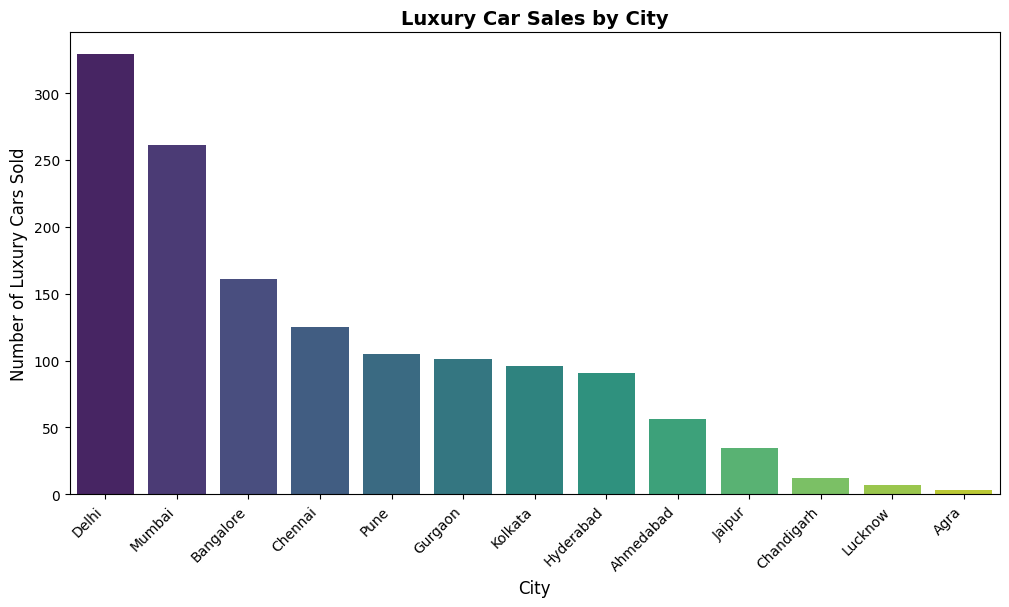

In [99]:
#Let's Check which city would be ideal to open a luxury car dealership
luxury_brands = [
    'Audi', 'BMW', 'Mercedes-Benz', 'Jaguar', 'Land Rover',
    'Volvo', 'Porsche', 'Mini', 'Lexus', 
]
df_luxury = df[df['brand_name'].isin(luxury_brands)]

city_luxury_sales = (
    df_luxury.groupby('city')
    .size()
    .reset_index(name='luxury_car_sales')
    .sort_values(by='luxury_car_sales', ascending=False)
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=city_luxury_sales,
    x='city', y='luxury_car_sales',
    palette='viridis',hue='city'
)

plt.title('Luxury Car Sales by City', fontsize=14, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Luxury Cars Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

Delhi appears to be the best city to open a luxury used car dealership, showing the highest sales of luxury vehicles among all cities — a clear sign of strong demand and buyer interest.

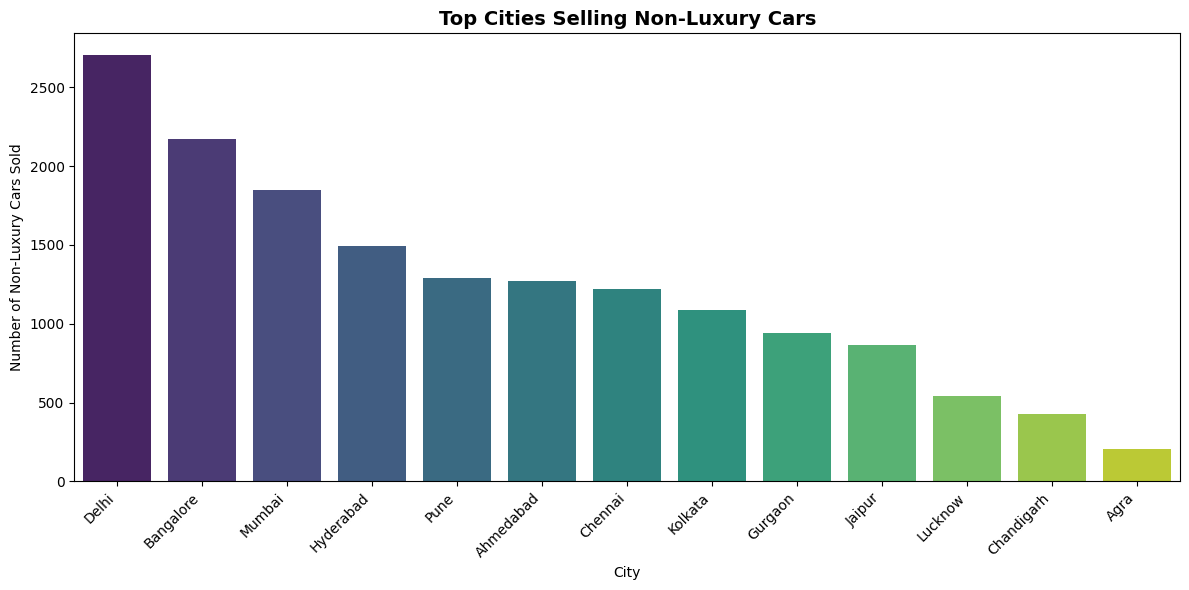

In [ ]:
#Check for which city would be best to open a dealership of mainsream cars. ie. cars that are not luxury.
mainstream_brands = df[~df['brand_name'].isin(luxury_brands)]['brand_name'].unique()
mainstream_df = df[df['brand_name'].isin(mainstream_brands)]

city_mainstream_sales = (
    mainstream_df.groupby('city')
    .size()
    .reset_index(name='mainstream_car_sales')
    .sort_values(by='mainstream_car_sales', ascending=False)
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=city_mainstream_sales,
    x='city',
    y='mainstream_car_sales',
    palette='viridis',hue='city'
)
plt.title("Top Cities Selling Non-Luxury Cars", fontsize=14, fontweight='bold')
plt.xlabel("City")
plt.ylabel("Number of Non-Luxury Cars Sold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The visualization indicates that Delhi leads in overall car sales, encompassing both mainstream and luxury segments. This makes Delhi the most strategic location for establishing a used car dealership, catering effectively to both everyday car buyers and premium vehicle customers.

Say you want to open a dealership in delhi. which cars should you use to fill your inventory?

C:\Users\IDAMIN\AppData\Local\Temp\ipykernel_17920\1639260369.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_df['price_segment'] = delhi_df['resale_price'].apply(price_segment)


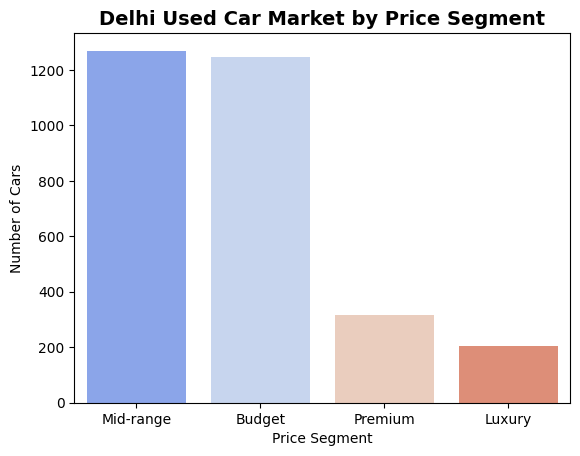

In [101]:
#check which price segment dominates delhi's market
delhi_df = df[df['city'] == 'Delhi']

#add a classification of cars for normalization
def price_segment(price):
    if price <= 500000:
        return 'Budget'
    elif price <= 1500000:
        return 'Mid-range'
    elif price <= 3000000:
        return 'Premium'
    else:
        return 'Luxury'

delhi_df['price_segment'] = delhi_df['resale_price'].apply(price_segment)
segment_counts = delhi_df['price_segment'].value_counts().reset_index()
segment_counts.columns = ['price_segment', 'count']

sns.barplot(data=segment_counts, x='price_segment', y='count', palette='coolwarm',hue='price_segment')
plt.title("Delhi Used Car Market by Price Segment", fontsize=14, fontweight='bold')
plt.xlabel("Price Segment")
plt.ylabel("Number of Cars")
plt.show()

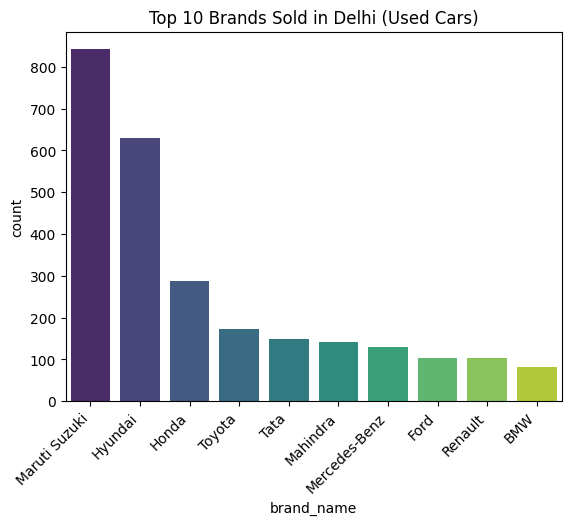

In [ ]:

#check which brand has the majority of sells in the city 
top_brands_delhi = (
    delhi_df['brand_name']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'brand_name'})
)

sns.barplot(data=top_brands_delhi, x='brand_name', y='count', palette='viridis',hue = 'brand_name')
plt.title("Top 10 Brands Sold in Delhi (Used Cars)")
plt.xticks(rotation=45, ha='right')
plt.show()


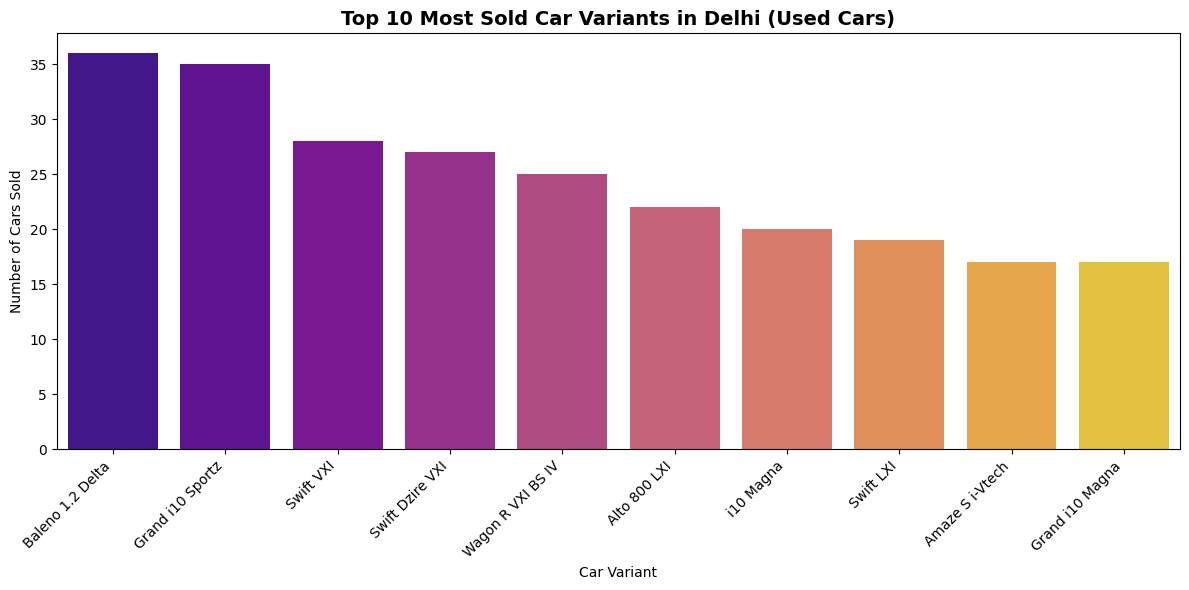

In [102]:
# Count the most sold variants
top_variants_delhi = (
    delhi_df['variant_name']
    .value_counts()
    .head(10)
    .reset_index()
)
top_variants_delhi.columns = ['variant_name', 'count']

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_variants_delhi,
    x='variant_name',
    y='count',
    palette='plasma',hue='variant_name'
)
plt.title("Top 10 Most Sold Car Variants in Delhi (Used Cars)", fontsize=14, fontweight='bold')
plt.xlabel("Car Variant")
plt.ylabel("Number of Cars Sold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
variant_stats = (
    delhi_df.groupby('variant_name')['resale_price']
    .agg(['count', 'mean'])
    .sort_values(by='count', ascending=False)
    .head(10)
    .reset_index()
)


In [ ]:
#check for what's the appropriate old cars one should fill their inventory with
car_age_distribution = (
    delhi_df['car_age']
    .round()  # Round age to nearest year
    .value_counts()
    .sort_index()
)
mode_age = delhi_df['car_age'].mode()[0]
print(f"Most common car age in Delhi: {mode_age:.0f} years")

# Approximate range of top-selling age group
top_range = delhi_df['car_age'].between(4, 8).mean()
print(f"Percentage of cars aged 4–8 years: {top_range*100:.2f}%")


Most common car age in Delhi: 8 years
Percentage of cars aged 4–8 years: 49.14%


In [ ]:
#Fuel type distribution (with percentages)
fuel_distribution = (
    delhi_df['fuel_type']
    .value_counts(normalize=True)
    .mul(100)
    .round(0)
)
print("Fuel Type Distribution in Delhi (%):")
print(fuel_distribution)


Fuel Type Distribution in Delhi (%):
fuel_type
Petrol      66.0
Diesel      29.0
CNG          4.0
Electric     0.0
LPG          0.0
Name: proportion, dtype: float64


In [103]:
#transmission wise distribution
transmission_distribution = (
    delhi_df['transmission_type']
    .value_counts(normalize=True)
    .mul(100)
    .round(0)
)
print("\nTransmission Type Distribution in Delhi (%):")
print(transmission_distribution)


Transmission Type Distribution in Delhi (%):
transmission_type
Manual      70
Automatic   30
Name: proportion, dtype: float64


In [110]:
#how one should price their cars if they are filling it with cars agging from 4 to 8 years
delhi_age_filtered = delhi_df[(delhi_df['car_age'] >= 4) & (delhi_df['car_age'] <= 8)]

top_variants = (
    delhi_age_filtered['variant_name']
    .value_counts()
    .head(10)
    .index
)
top_variants_df = delhi_age_filtered[delhi_age_filtered['variant_name'].isin(top_variants)]

avg_price_by_variant = (
    top_variants_df.groupby('variant_name')['resale_price']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
avg_price_by_variant

,variant_name,resale_price
0,Innova Crysta 2.8 GX AT BSIV,"1,594,800"
1,Creta 1.6 VTVT AT SX Plus,"1,134,833"
2,Creta 1.4 E Plus CRDi,"888,000"
3,Vitara Brezza VDi,"729,091"
4,Baleno 1.2 Zeta,"632,100"
5,Baleno 1.2 Delta,"555,240"
6,Swift VXI,"548,071"
7,Amaze S i-VTEC,"521,400"
8,Grand i10 1.2 Kappa Magna BSIV,"455,214"
9,Alto 800 LXI,"322,267"




##  Delhi Used Car Market Summary

Delhi shows the **highest sales volume**, making it the **best city** to open a used car dealership. The market is dominated by **mid-range cars (₹15–30 lakhs)**, primarily from **Maruti Suzuki**.

### 🔹 Key Highlights

* **Top-selling brands:** Maruti Suzuki, Hyundai, Honda, Toyota
* **Popular variants:** Baleno 1.2 Delta, Grand i10 Sportz, Swift VXi, Swift Dzire, Wagon R
* **Ideal car age:** 4–8 years (≈50% of sales)
* **Fuel type:** 66% Petrol
* **Transmission:** 70% Manual

###  Recommendation

Focus on **mid-range, petrol, manual cars** aged **4–8 years**, with inventory centered around **Maruti Suzuki** and **Hyundai** models.




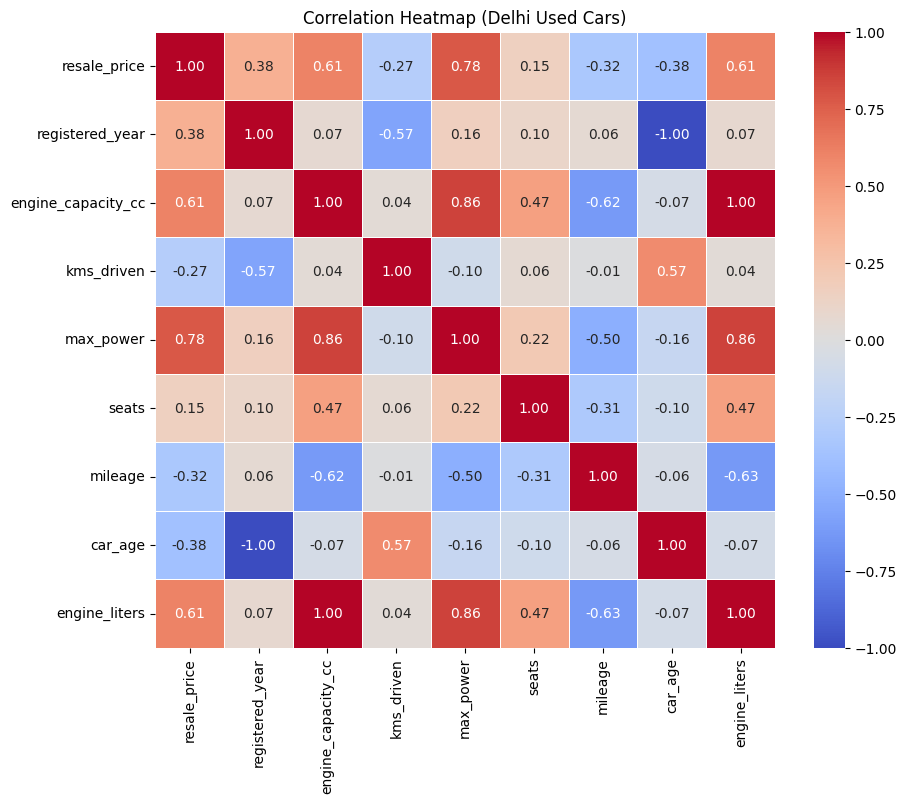

In [109]:
# Let's run a correlation check to see what's the relationship between numeric columns
corr_matrix = delhi_df.drop(columns=['id'], errors='ignore').select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Delhi Used Cars)")
plt.show()